<center><h1>Analyzing Automobile Fuel Economy Data</h1></center>

### QUESTION: Are Toyota vehicles more fuel efficient than Hondas?

**To answer this question, I found a government web site that has the data I was looking for:**

Data source: [http://www.fueleconomy.gov/feg/ws/index.shtml](http://www.fueleconomy.gov/feg/ws/index.shtml)<br>
Data file: [http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip](http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip)<br>
Data meta data: [http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)

#### I've installed the usual packages for data analyis and plotting:

In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [13]:
# I've downloaded the csv file, so let's see what's in it
vehicles = pd.read_csv('/home/pybokeh/temp/vehicles.csv')

### Let's profile our data set

In [70]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36792 entries, 0 to 36791
Data columns (total 83 columns):
barrels08          36792 non-null float64
barrelsA08         36792 non-null float64
charge120          36792 non-null float64
charge240          36792 non-null float64
city08             36792 non-null int64
city08U            36792 non-null float64
cityA08            36792 non-null int64
cityA08U           36792 non-null float64
cityCD             36792 non-null float64
cityE              36792 non-null float64
cityUF             36792 non-null float64
co2                36792 non-null int64
co2A               36792 non-null int64
co2TailpipeAGpm    36792 non-null float64
co2TailpipeGpm     36792 non-null float64
comb08             36792 non-null int64
comb08U            36792 non-null float64
combA08            36792 non-null int64
combA08U           36792 non-null float64
combE              36792 non-null float64
combinedCD         36792 non-null float64
combinedUF         36

**Se we have 36,792 rows and 83 columns of data. If you want to know what data each column contains, the metadata can be viewed [here](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)**

In [14]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.689436,0,0,0,19,0,0,0,0,0,0,-1,-1,0,423.190476,21,0,0,0,0,0,0,4,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0,0,0,0,0,0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0,0,0,0,Manual 5-spd,23.3333,0,35.0000,0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.950562,0,0,0,9,0,0,0,0,0,0,-1,-1,0,807.909091,11,0,0,0,0,0,0,12,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0,0,0,0,0,0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0,0,0,0,Manual 5-spd,11.0000,0,19.0000,0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.195570,0,0,0,23,0,0,0,0,0,0,-1,-1,0,329.148148,27,0,0,0,0,0,0,4,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0,0,0,0,0,0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0,0,0,0,Manual 5-spd,29.0000,0,47.0000,0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.950562,0,0,0,10,0,0,0,0,0,0,-1,-1,0,807.909091,11,0,0,0,0,0,0,8,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0,0,0,0,0,0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0,0,0,0,Automatic 3-spd,12.2222,0,16.6667,0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.337486,0,0,0,17,0,0,0,0,0,0,-1,-1,0,467.736842,19,0,0,0,0,0,0,4,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2100,0,Premium,Premium Gasoline,-1,-1,23,0,0,0,0,0,0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0,0,0,0,Manual 5-spd,21.0000,0,32.0000,0,Compact Cars,1993,-3750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### If you rather observe the columns vertically, we can transpose just the 1st 3 rows of the dataframe:

In [71]:
vehicles.head(3).transpose()

,0,1,2
barrels08,15.6894,29.9506,12.1956
barrelsA08,0,0,0
charge120,0,0,0
charge240,0,0,0
city08,19,9,23
city08U,0,0,0
cityA08,0,0,0
cityA08U,0,0,0
cityCD,0,0,0
cityE,0,0,0


#### Let's say you are wondering how the overall combined fuel economy (highway + city) has improved with each successive model year of gasoline-based automobiles, how would you find out?

Looking at the data [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle), looks like I need to filter based off of "fuelType", "fuelType1", "fuelType2", and "atvType".

**Looks like we can't filter using "fuelType" since there are categories like "Gasoline and natural gas" which we don't want if we're just looking for gas only vehicles.**

In [16]:
vehicles.fuelType.value_counts()

Regular                        24616
Premium                         9524
Gasoline or E85                 1164
Diesel                          1090
Premium or E85                   116
Electricity                       95
Midgrade                          61
CNG                               60
Gasoline or natural gas           20
Premium Gas or Electricity        14
Regular Gas and Electricity       14
Premium and Electricity            9
Gasoline or propane                8
Regular Gas or Electricity         1
Name: fuelType, dtype: int64

**Looks like we can use "fuelType1" as the primary column to filter with**

In [17]:
vehicles.fuelType1.value_counts()

Regular Gasoline     25823
Premium Gasoline      9663
Diesel                1090
Electricity             95
Midgrade Gasoline       61
Natural Gas             60
Name: fuelType1, dtype: int64

In [18]:
vehicles.fuelType2.value_counts()

E85            1280
Electricity      38
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

In [19]:
vehicles.atvType.value_counts()

FFV               1280
Diesel            1018
Hybrid             424
EV                  95
CNG                 50
Plug-in Hybrid      38
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64

### Our first attempt to filter our data to just gasoline powered vehicles

In [63]:
# Ensure automobile only takes gasoline as fuel
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])

# Ensure it doesn't have a secondary fuel source
criteria2 = vehicles.fuelType2.isnull()

# I noticed after applying criteria 1 and 2, there were hybrids in my list under the atvType column
# So I want to ensure hybrids are excluded as well
criteria3 = vehicles.atvType.isnull()

In [64]:
# Apply the criteria
gas_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]

### Let's double-check that we don't have non-gasoline models in our data set

Since I am mostly familiar with Hondas, let's filter our data to just Honda vehicles

In [65]:
only_honda = gas_vehicle_non_hybrid['make']=='Honda'

# Apply the criteria
honda = gas_vehicle_non_hybrid[only_honda]
honda.model.value_counts()

Civic                   151
Accord                  141
Prelude                  70
Odyssey                  31
CR-V 4WD                 30
Civic CRX                29
Fit                      27
Passport 2WD             22
CR-V 2WD                 21
Civic Wagon              21
Accord Wagon             20
Accord Coupe             20
Element 4WD              18
Passport 4WD             18
Element 2WD              17
Pilot 4WD                15
Civic Del Sol            14
Civic CRX HF             14
Civic HX                 12
Pilot 2WD                12
Del Sol                  10
Civic Wagon 4WD          10
S2000                    10
Ridgeline Truck 4WD       9
Crosstour 2WD             8
Civic HB VX               8
Civic HF                  4
Crosstour 4WD             4
Civic 4Dr                 3
HR-V 2WD                  3
HR-V 4WD                  2
Accord Crosstour 4WD      2
Accord Crosstour 2WD      2
Name: model, dtype: int64

**Looks good to me.  I don't see the Insight or hybrid models in the list.**

In [89]:
# Group the data by model year
grouped = gas_vehicle_non_hybrid.groupby(['year'])

In [90]:
# Get the average mpg for each model year
average = grouped['comb08'].agg(np.mean)

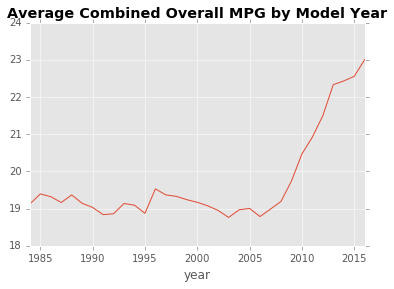

In [91]:
# Let's plot the average mpg with each model year
average.plot()
plt.title("Average Combined Overall MPG by Model Year", weight='bold')
plt.show()

**If you're wondering why the decline in fuel economy beginning around mid-90s, more weight was subsequently added to the vehicles as more safety features were added (additional airbags, reinforced metals in frames and doors).  Also, during this time, is the introduction of more SUVs and minivans.  Sadly, the data set does not include vehicle weight which would have been nice to compare MPG on a per unit of weight basis.**

## Let's compare combined (city + hwy) average overall mpg of gasonline-based Honda/Acura vs Toyota/Lexus

In [103]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != 'Hybrid'
criteria4 = vehicles.make.isin(['Honda','Toyota'])

honda_toyota_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3 & criteria4]

In [104]:
# Since I need to plot honda and toyota data on same plot, I had to resort to creating a dataframe
# using pandas pivot_table method instead of the groupby / agg() method that I did above
honda_toyota_average = honda_toyota_vehicle_non_hybrid.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

In [105]:
honda_toyota_average.head()

make,Honda,Toyota
year,,
1984,28.083333,23.044118
1985,26.906250,22.925926
1986,27.650000,21.660714
1987,27.750000,21.875000
1988,27.791667,21.422535


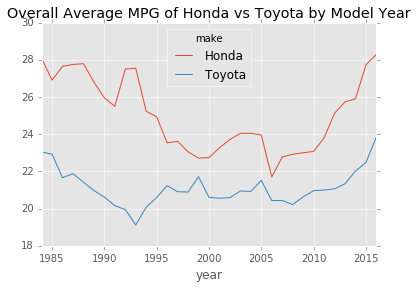

In [106]:
honda_toyota_average.plot()
plt.title("Overall Average MPG of Honda vs Toyota by Model Year")
plt.show()

**Wow didn't know Toyota lagged this much in fuel economy behind Honda for gas-based vehicles in recent years.  Maybe they focused on hybrid/electric motor efficiency?<br><br>
Chart above is somewhat misleading because I know for a fact Toyota has a larger fleet of larger vehicles and pickup trucks compared to Honda, which probably skewed their MPG to lower values.**

### So to make things fair, let's limit our Honda/Toyota data to just smaller vehicles, SUVs, and minivans:

- Compact Cars
- Subcompact Cars
- Midsize Cars
- Large Cars
- Sport Utility Vehicle - 4WD
- Sport Utility Vehicle - 2WD
- Minivan - 2WD
- Minivan - 4WD

Looking at the [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle) again, we can filter by vehicle class using the VClass column.

In [96]:
vehicles.VClass.value_counts()

Compact Cars                          5341
Subcompact Cars                       4733
Midsize Cars                          4193
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2090
Two Seaters                           1810
Large Cars                            1759
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1467
Special Purpose Vehicles              1455
Minicompact Cars                      1194
Standard Pickup Trucks 2WD            1153
Vans                                  1141
Standard Pickup Trucks 4WD             954
Midsize-Large Station Wagons           643
Special Purpose Vehicle 2WD            590
Small Pickup Trucks                    538
Midsize Station Wagons                 526
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                418
Small Sport Utility Vehicle 4WD        399
Minivan - 2WD                          330
Standard Sport Utility Vehicle 4WD     330
Small Sport

In [121]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType.isnull()
criteria4 = vehicles.make.isin(['Honda','Toyota'])
# We can use regular expressions to match partial strings and implement OR selection logic:
criteria5 = vehicles.VClass.str.contains('Compact Cars|Subcompact Cars|Midsize Cars|Large Cars|Sport Utility|Minivan')

honda_toyota_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3 & criteria4
                                           & criteria5]

honda_toyota_average = honda_toyota_vehicle_non_hybrid.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

### Before we plot the data, let's make sure we got the data we expect

In [122]:
# You never know, there could be leading or trailing whitespace(s) which cause us 
# to miss the data
honda_toyota_vehicle_non_hybrid.VClass.value_counts()

Subcompact Cars                       465
Compact Cars                          293
Sport Utility Vehicle - 4WD           194
Midsize Cars                          178
Sport Utility Vehicle - 2WD           164
Minivan - 2WD                          47
Small Sport Utility Vehicle 2WD        38
Large Cars                             33
Small Sport Utility Vehicle 4WD        32
Standard Sport Utility Vehicle 4WD     19
Minivan - 4WD                          12
Standard Sport Utility Vehicle 2WD      8
Name: VClass, dtype: int64

### Looks to be ok, so let's plot the data

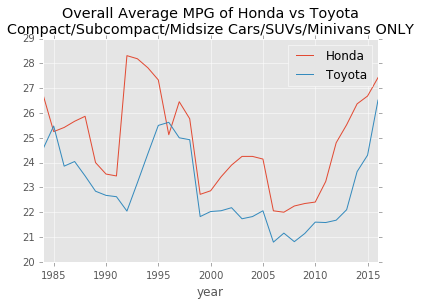

In [127]:
honda_toyota_average.plot()
plt.title("Overall Average MPG of Honda vs Toyota\nCompact/Subcompact/Midsize Cars/SUVs/Minivans ONLY")
plt.legend(loc='best')
plt.show()

### Even though we limited our data to just smaller cars, SUVs, and minivans, for most model years, Honda vehicles are still more fuel efficient than Toyota vehicles.  2016 data should be disregarded since it is incomplete data.